# 1.导入所需要的包

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2.示例数据vgsales.csv

In [5]:
df = pd.read_csv("../data/vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# 3.检查最大年值，这是一个不可能的发布日期。通过错误年份查看条目的名称，我们可以在网上搜索游戏的发布日期，并将当前值替换为正确的发布为2009。

In [6]:
year_data = df['Year']
print("Max Year Value: ", year_data.max())

Max Year Value:  2020.0


In [9]:
max_entry = year_data.idxmax()
print(max_entry)

5957


In [12]:
df['Year']=df['Year'].replace(2020.0,2009.0)
print("Max Year Value: ", year_data.max())

Max Year Value:  2017.0


# 4.下面我们检查游戏(行)的数量和独特的发行者、平台和类型的数量，以了解我们在数据集中的游戏是如何被明确地分布的。

# 5.下面我们检查games(行)的数量和Publisher的数量、Platform数量和Genre的数量。

In [14]:
print("Number of games: ", len(df))
publishers = df['Publisher'].unique()
print("Number of publishers: ", len(publishers))
platforms = df['Platform'].unique()
print("Number of platforms: ", len(platforms))
genres = df['Genre'].unique()
print("Number of genres: ", len(genres))

Number of games:  16598
Number of publishers:  579
Number of platforms:  31
Number of genres:  12


# 6.我们做一个简单的空值检查。但现在我们只需删除那些没有所有数据的游戏的条目。

In [15]:
print(df.isnull().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [16]:
df = df.dropna()

In [17]:
print(df.isnull().sum())

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


# 7.根据年份分组统计每年的“全球销售”总量作为x。
# 8.讲Global_Sales作为y 设置画板大小（(12,8)）
# 9.将创建一个以我们的年份作为索引或行名的数据RAME，以及该年总销售额的条目。在数据集中
# 10.表示年份的x索引是浮点数，例如“2006.0”而不是“2006年”。
# 11.将x和y变量传递给我们的Seborn.barplot()函数
# 设置x轴的标签为百万（16字体大小） y标签为年（16字体大小），title标签为游戏每年销量（20字体大小）

In [20]:
y = df.groupby(['Year']).sum()
y

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,
1980.0,29826,10.59,0.67,0.00,0.12,11.38
1981.0,190488,33.40,1.96,0.00,0.32,35.77
1982.0,149186,26.92,1.65,0.00,0.31,28.86
1983.0,56759,7.76,0.80,8.10,0.14,16.79
1984.0,22911,33.28,2.10,14.27,0.70,50.36
1985.0,55505,33.73,4.74,14.56,0.92,53.94
1986.0,35986,12.50,2.84,19.81,1.93,37.07
1987.0,54701,8.46,1.41,11.63,0.20,21.74
1988.0,37181,23.87,6.59,15.76,0.99,47.22


In [21]:
y = y['Global_Sales']
y

Year
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.16
1993.0     45.98
1994.0     79.17
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.47
1999.0    251.27
2000.0    201.56
2001.0    331.47
2002.0    395.52
2003.0    357.85
2004.0    414.01
2005.0    458.51
2006.0    521.04
2007.0    609.92
2008.0    678.90
2009.0    667.59
2010.0    600.29
2011.0    515.80
2012.0    363.49
2013.0    368.11
2014.0    337.03
2015.0    264.44
2016.0     70.90
2017.0      0.05
Name: Global_Sales, dtype: float64

In [22]:
x = y.index.astype(int)
x

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013, 2014, 2015, 2016, 2017],
           dtype='int64')

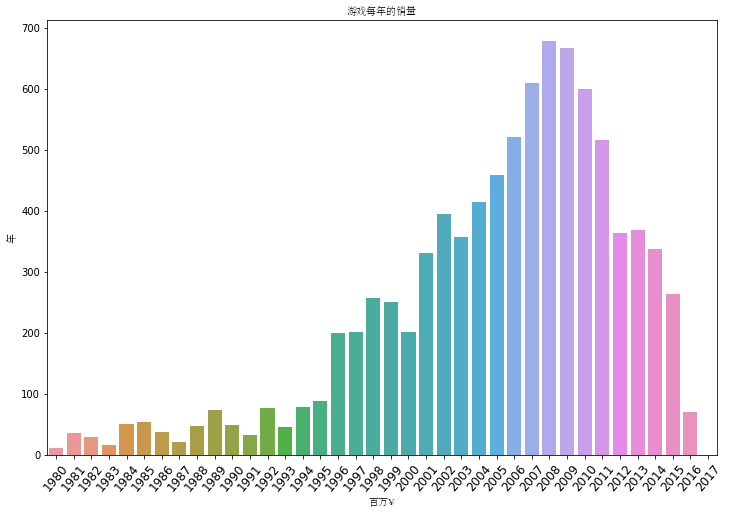

In [23]:
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname='../data/STSONG.TTF')

plt.figure(figsize=(12,8))
ax = sns.barplot(y = y, x = x)
ax.set_xlabel(xlabel='百万¥', fontsize=16, fontproperties=my_font)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='年', fontsize=16, fontproperties=my_font)
ax.set_title(label='游戏每年的销量', fontsize=20, fontproperties=my_font)
plt.show();